# Load Dependencies

In [1]:
import pandas as pd
from feature_engine.selection import SmartCorrelatedSelection
from script.utils import get_ori_independence

# Descriptor Indepence

In [2]:
selector = SmartCorrelatedSelection(threshold=0.9, method='pearson')

pure_solvents=pd.read_excel('descriptor/descriptors of pure solvents.xlsx')
pure_electrodes=pd.read_excel('descriptor/descriptors of pure electrodes.xlsx')
pure_electrolytes=pd.read_excel('descriptor/descriptors of pure electrolytes.xlsx')
cp2onehot = {'0.3 mA':[1,0,0,0,0,0],'0.6 mA':[0,1,0,0,0,0],
             '0.9 mA':[0,0,1,0,0,0],'1.2 mA':[0,0,0,1,0,0],
             '1.0 V':[0,0,0,0,1,0],'1.5 V':[0,0,0,0,0,1]}
pure_cp = pd.DataFrame([cp2onehot[i] for i in cp2onehot.keys()])
print(pure_solvents.shape[1], pure_electrodes.shape[1], pure_electrolytes.shape[1],pure_cp.shape[1])

pure_solvents=selector.fit_transform(pure_solvents)
pure_electrodes=selector.fit_transform(pure_electrodes)
pure_electrolytes=selector.fit_transform(pure_electrolytes)
pure_cp=selector.fit_transform(pure_cp)
print(pure_solvents.shape[1], pure_electrodes.shape[1], pure_electrolytes.shape[1],pure_cp.shape[1])
low_cd = pd.concat([pure_solvents, pure_electrodes, pure_electrolytes,pure_cp], axis=1)
low_cd.head(4)

21 3 7 6
10 3 7 6


,Solvent selections,Electrochemical Window start / V,Delta Electrochemical Window/ V,Viscosity / mPa.s,Complexity,HeavyAtomCount,XStericQuadrupole3D,YStericQuadrupole3D,ZStericQuadrupole3D,FeatureDonorCount3D,...,conductivity in EtOH / μS/cm,conductivity in TFE / μS/cm,Onset potential of A / V,Tafel slope of A / mV/dec,0,1,2,3,4,5
0,AcOH,1.95,2.51,1.0560,31.0,4.0,1.33,1.11,0.56,0.0,...,789.2,621.2,1.5088,138,1.0,0.0,0.0,0.0,0.0,0.0
1,TFE,3.21,5.72,1.7546,38.0,6.0,1.70,0.93,0.86,1.0,...,351.8,630.2,1.5112,190,0.0,1.0,0.0,0.0,0.0,0.0
2,EtOH,2.11,4.51,1.0740,2.0,3.0,1.48,0.75,0.58,1.0,...,855.1,320.4,1.4966,143,0.0,0.0,1.0,0.0,0.0,0.0
3,MeCN,4.17,7.10,0.3330,29.0,3.0,1.69,0.59,0.59,0.0,...,212.4,510.5,1.5063,185,0.0,0.0,0.0,1.0,0.0,0.0


# Results of solvent

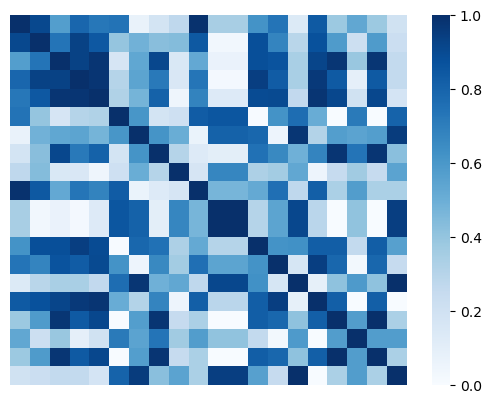

In [3]:
relation,name=get_ori_independence('descriptor/descriptors of pure solvents.xlsx','sol')

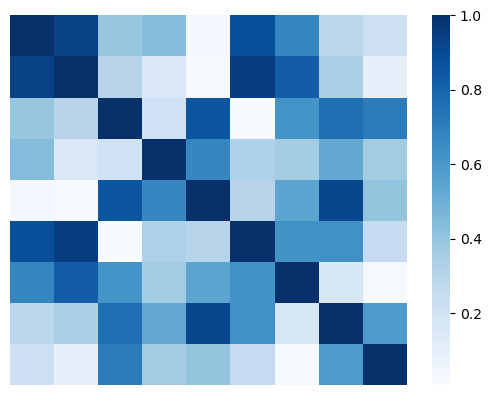

In [4]:
relation,name=get_ori_independence('descriptor/descriptors of solvents indepence.xlsx','sol')

# Results of electrodes

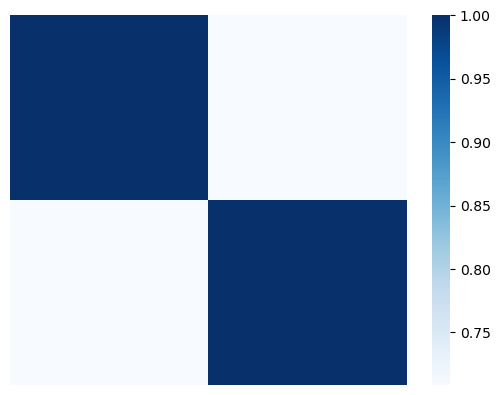

In [5]:
relation,name=get_ori_independence('descriptor/descriptors of pure electrodes.xlsx','ele')

# Results of electrolytes

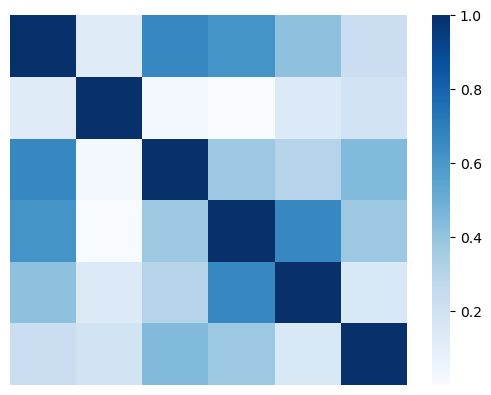

In [6]:
relation,name=get_ori_independence('descriptor/descriptors of pure electrolytes.xlsx','ele')

# Results of current/pottential

(array([[1. , 0.2, 0.2, 0.2, 0.2],
        [0.2, 1. , 0.2, 0.2, 0.2],
        [0.2, 0.2, 1. , 0.2, 0.2],
        [0.2, 0.2, 0.2, 1. , 0.2],
        [0.2, 0.2, 0.2, 0.2, 1. ]]),
 ['0.3 mA', '0.6 mA', '0.9 mA', '1.2 mA', '1.0 V', '1.5 V'])

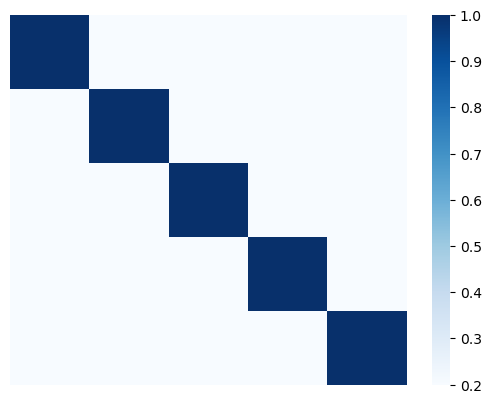

In [8]:
get_ori_independence(pure_cp,'cp')